In [215]:
import pandas as pd
import numpy as np
import re



In [216]:
df = pd.read_csv("Pakistan Startup Census.csv")
df

,Name,Location,Tagline,Category,Website,Founded,Description
0,Outnet,Karachi Pakistan,Cloud based SaaS platform for planning procur...,Advertising OOH Outdoor Advertising Data an...,http://www.outnet.com.pk,1st September 2014,24Grey is a T4M (technology for marketing) com...
1,7Vals,Lahore Pakistan,Understanding and enabling businesses to impro...,Consulting Rails Product Development UI,http://www.7vals.com,2011,We're changing the way businesses work by maki...
2,92Solution,Lahore Pakistan,92 Solution A Pakistani Company Giving his Pa...,Consulting Website & Software Development,http://92solution.com,7th January 2015,92 Solution is a Software & Website Developmen...
3,A2Z Yellow Pages & Info Services,Lahore,Find local Businesses and Services in Pakistan...,Online Business Directory & Portal,https://www.yp-pak.com,30th January 2017,A2Z| Yellow Pages Pakistan will be the innovat...
4,AALogics,Karachi Pakistan,NaN,Consulting Software,http://www.aalogics.com,1st August 2014,IT Consulting Web development & Designing Lo...
...,...,...,...,...,...,...,...
428,Yum to Yikes,Islamabad Pakistan,Yum to Yikes aims to inform entertain and gui...,Media/News,http://yumtoyikes.com,1st May 2015,We are a bunch of enthusiastically-creative fo...
429,Zambeel,Multan Pakistan,Online Shopping for Quality Products at lowest...,E-commerce,https://www.zambeel.com,2015,Online Shopping for Quality Products at lowest...
430,Zameen,Lahore Pakistan,Zameen.com has single-handedly revolutionized ...,Property Portal,http://www.zameen.com/,2006,NaN
431,Zest,Islamabad Pakistan,Zest is the Pakistan's first on-demand massage...,Health,NaN,10th December 2016,Zest is the Massage On Demand company. Availab...


In [217]:
df.shape

(433, 7)

In [218]:
df.columns

Index(['Name', 'Location', 'Tagline', 'Category', 'Website', 'Founded',
       'Description'],
      dtype='object')

In [219]:
df.isnull().sum()

Name            0
Location        0
Tagline         2
Category        0
Website        15
Founded         0
Description    43
dtype: int64

In [220]:
df.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
428    False
429    False
430    False
431    False
432    False
Length: 433, dtype: bool

In [221]:
duplicates_in_column = df[df.duplicated(subset=['Name'], keep=False)]
duplicates_in_column

,Name,Location,Tagline,Category,Website,Founded,Description
142,Goodshop.pk,Lahore Pakistan,Goodshop.pk offers Online Shopping in Pakistan...,E-Commerce,https://www.goodshop.pk,1st September 2015,Goodshop.pk offers Online Shopping in Pakistan...
143,Goodshop.pk,Lahore Pakistan,Goodshop.pk offers Online Shopping in Pakistan...,E-Commerce,http://www.goodshop.pk,14th August 2016,Goodshop.pk offers Online Shopping in Pakistan...


In [222]:
# Drop duplicate rows based on the 'Name' column
df_cleaned = df.drop_duplicates(subset=['Name'], keep='last')
 #I am keeping the latest entry that is the last one to consider the correct one

In [223]:
duplicates_in_column = df_cleaned[df_cleaned.duplicated(subset=['Name'], keep=False)]
duplicates_in_column

,Name,Location,Tagline,Category,Website,Founded,Description


In [224]:
df_cleaned.shape

(432, 7)

In [225]:
df_cleaned.dtypes

Name           object
Location       object
Tagline        object
Category       object
Website        object
Founded        object
Description    object
dtype: object

In [226]:
df_sorted = df_cleaned.sort_values(by='Location')
df_sorted.head(5)

,Name,Location,Tagline,Category,Website,Founded,Description
16,Assemblage,214 Block B 13D/2 Gulshan e Iqbal Karachi P...,Assemblage is an online Parenting Community an...,e-Magazine Website,www.assemblagekids.com,16th June 2016,Welcome to Assemblage Community Assemblage is ...
81,Credvestor,3rd Floor Citiview Naheed Supermarket Building...,An innovative peer-to-peer lending bazaar for ...,Software Finance,http://www.credvestor.com/,1st August 2016,Credvestor is an innovative peer-to-peer lendi...
187,Kaanjo,Amsterdam,We help our clients give a voice to the silent...,Software,http:// kaanjo.co,16th September 2016,Because we believe all consumers should easily...
149,HAT incorporation,Block I North Nazimabad Karachi Pakistan,Hat inco is a software house and a computer in...,Software House Services,http://www.hatinco.com,1st January 2000,Software House Computer Institute Web developm...
104,Edev Technologies,Canada,Build great requirements together,Software Product Software Services Software ...,http://www.edevtech.com,1999,A requirements lifecycle solutions company ded...


In [227]:
df_sorted.Location.unique()

array(['214  Block B  13D/2 Gulshan e Iqbal Karachi  Pakistan ',
       '3rd Floor Citiview Naheed Supermarket Building Shaheed e Millat road Karachi  Pakistan',
       'Amsterdam', 'Block I North Nazimabad Karachi  Pakistan', 'Canada',
       'Dallas  Texas  United States', 'Dubai', 'Dubai  UAE',
       'Dubai  UAE - 1015 Arfa Software Technology Park Lahore Pakistan',
       'Faisalabad  Pakistan', 'Faisalabad Pakistan',
       'Go Logistics  Ground Floor  Palace Cinema Building  Civil Lines  Karachi',
       'Gujranwala  Pakistan', 'Gujrat  Pakistan', 'Gujrat Pakistan',
       'Hyderabad  Pakistan',
       'IBA Center for Entrepreneurial Development  Karachi  Pakistan',
       'Islamabad', 'Islamabad  PAkistan', 'Islamabad  Pakistan',
       'Johar Town  Lahore', 'Karachi', 'Karachi  Pakistan',
       'Karachi  Pakistan ', 'Karachi  Pakistan.', 'Karachi Pakistan',
       'Karachi Pakistan ', 'Karachi Â· Pakistan ', 'Lahore',
       'Lahore   Pakistan', 'Lahore  Manchester', 'Lahore 

By looking at the data we can see that We have t some Foreign regsitered startups also listed here, 
Lets seggerate our data first in Pakistan - regsitersd Startup and Foreign Registered Startups, so we are creating a country column in which we tagging our startups as Foreign and Pakistan

In [228]:
# Function to extract the country name
def extract_country(location):
    if 'Pakistan' in location:
        return 'Pakistan'
    else:
        return 'Foreign'


# df_sorted['Country'] = df_sorted['Location'].apply(lambda x: 'Pakistan' if 'Pakistan' in x else 'Foreign')


In [229]:
df_sorted['Country'] = df_sorted['Location'].apply(extract_country)
# Separate Pakistan-based and Foreign-based startups
pakistan_based = df_sorted[df_sorted['Country'] == 'Pakistan']
foreign_based = df_sorted[df_sorted['Country'] == 'Foreign']


In [230]:
pakistan_based



,Name,Location,Tagline,Category,Website,Founded,Description,Country
16,Assemblage,214 Block B 13D/2 Gulshan e Iqbal Karachi P...,Assemblage is an online Parenting Community an...,e-Magazine Website,www.assemblagekids.com,16th June 2016,Welcome to Assemblage Community Assemblage is ...,Pakistan
81,Credvestor,3rd Floor Citiview Naheed Supermarket Building...,An innovative peer-to-peer lending bazaar for ...,Software Finance,http://www.credvestor.com/,1st August 2016,Credvestor is an innovative peer-to-peer lendi...,Pakistan
149,HAT incorporation,Block I North Nazimabad Karachi Pakistan,Hat inco is a software house and a computer in...,Software House Services,http://www.hatinco.com,1st January 2000,Software House Computer Institute Web developm...,Pakistan
163,ILMASOFT,Dubai UAE - 1015 Arfa Software Technology Par...,Educational and security products for schools ...,Software,http://www.ilmasoft.com,13th August 2010,We build applications for the vertical sectors...,Pakistan
47,BrandsEgo.Com,Faisalabad Pakistan,Buy with confidence. We are Manufacturer and E...,E-Commerce,https://brandsego.com,1st September 2014,Buy with confidence. We are Manufacturer and E...,Pakistan
...,...,...,...,...,...,...,...,...
371,The Books Yard,Sialkot Pakistan,The Books sell Books Online in Pakistan.,Education,https://www.facebook.com/thebooksyard,4th January 2018,This Company sell Books online.,Pakistan
201,Learn DAE,Wah Pakistan,Learn DAE is a Non-Profit Technical Educationa...,Technical Education,www.learndae.org.pk,7th December 2016,Learn DAE is a Non-Profit and Non-Government T...,Pakistan
84,Daastan,Wah Cantt Pakistan,Daastan is a for-profit company working for re...,Literature Publishing Marketplace,http://www.daastan.com,22nd December 2014,Our mission is to connect all stakeholders of ...,Pakistan
422,Pehnji,Z43/44 first floor darul aman society block 7/...,Online shopping from the Pakistan's best marke...,E-Commerce,http://www.pehnji.com,16th February 2016,pehjni has bigger objective beside becoming Pa...,Pakistan


We also have found that we have incomplet Locaations in the column, which Only showing the country so we have to drop it because it will cause problem when we will be filltering data for the cities of Pakistan

Extracting Cities fromt the pakistan-based startups

In [231]:
def extract_city(location):
    parts = location.split()
    if 'Pakistan' in parts or 'Pakistan.' in parts:
        idx = parts.index('Pakistan') if 'Pakistan' in parts else parts.index('Pakistan.') #Considering Pakistan. scenaro her too
        if idx >= 0:
            # Check if the word before 'Pakistan' is a province
            if parts[idx - 1] in ['Punjab', 'Sindh', 'Balochistan']:
                city = parts[idx - 2]
            elif parts[idx - 1] == 'Pakhtunkhwa':
                # Check if 'Khyber' is present directly before 'Pakhtunkhwa'
                if parts[idx - 2] == 'Khyber':
                    # Extract the city name before 'Khyber'
                    city = parts[idx - 3]
                else:
                    city = parts[idx - 2]
            else:
                city = parts[idx - 1]
        else:
            city = None
    else:
        city = None
    return city

# Apply the function to create a new column 'City'
pakistan_based['City'] = pakistan_based['Location'].apply(extract_city)

pakistan_based


C:\Users\NimZee\AppData\Local\Temp\ipykernel_21236\113054989.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name,Location,Tagline,Category,Website,Founded,Description,Country,City
16,Assemblage,214 Block B 13D/2 Gulshan e Iqbal Karachi P...,Assemblage is an online Parenting Community an...,e-Magazine Website,www.assemblagekids.com,16th June 2016,Welcome to Assemblage Community Assemblage is ...,Pakistan,Karachi
81,Credvestor,3rd Floor Citiview Naheed Supermarket Building...,An innovative peer-to-peer lending bazaar for ...,Software Finance,http://www.credvestor.com/,1st August 2016,Credvestor is an innovative peer-to-peer lendi...,Pakistan,Karachi
149,HAT incorporation,Block I North Nazimabad Karachi Pakistan,Hat inco is a software house and a computer in...,Software House Services,http://www.hatinco.com,1st January 2000,Software House Computer Institute Web developm...,Pakistan,Karachi
163,ILMASOFT,Dubai UAE - 1015 Arfa Software Technology Par...,Educational and security products for schools ...,Software,http://www.ilmasoft.com,13th August 2010,We build applications for the vertical sectors...,Pakistan,Lahore
47,BrandsEgo.Com,Faisalabad Pakistan,Buy with confidence. We are Manufacturer and E...,E-Commerce,https://brandsego.com,1st September 2014,Buy with confidence. We are Manufacturer and E...,Pakistan,Faisalabad
...,...,...,...,...,...,...,...,...,...
371,The Books Yard,Sialkot Pakistan,The Books sell Books Online in Pakistan.,Education,https://www.facebook.com/thebooksyard,4th January 2018,This Company sell Books online.,Pakistan,Sialkot
201,Learn DAE,Wah Pakistan,Learn DAE is a Non-Profit Technical Educationa...,Technical Education,www.learndae.org.pk,7th December 2016,Learn DAE is a Non-Profit and Non-Government T...,Pakistan,Wah
84,Daastan,Wah Cantt Pakistan,Daastan is a for-profit company working for re...,Literature Publishing Marketplace,http://www.daastan.com,22nd December 2014,Our mission is to connect all stakeholders of ...,Pakistan,Cantt
422,Pehnji,Z43/44 first floor darul aman society block 7/...,Online shopping from the Pakistan's best marke...,E-Commerce,http://www.pehnji.com,16th February 2016,pehjni has bigger objective beside becoming Pa...,Pakistan,Karachi


In [232]:
pakistan_based['City'] = pakistan_based['Location'].apply(extract_city)
pakistan_based

C:\Users\NimZee\AppData\Local\Temp\ipykernel_21236\2232085017.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name,Location,Tagline,Category,Website,Founded,Description,Country,City
16,Assemblage,214 Block B 13D/2 Gulshan e Iqbal Karachi P...,Assemblage is an online Parenting Community an...,e-Magazine Website,www.assemblagekids.com,16th June 2016,Welcome to Assemblage Community Assemblage is ...,Pakistan,Karachi
81,Credvestor,3rd Floor Citiview Naheed Supermarket Building...,An innovative peer-to-peer lending bazaar for ...,Software Finance,http://www.credvestor.com/,1st August 2016,Credvestor is an innovative peer-to-peer lendi...,Pakistan,Karachi
149,HAT incorporation,Block I North Nazimabad Karachi Pakistan,Hat inco is a software house and a computer in...,Software House Services,http://www.hatinco.com,1st January 2000,Software House Computer Institute Web developm...,Pakistan,Karachi
163,ILMASOFT,Dubai UAE - 1015 Arfa Software Technology Par...,Educational and security products for schools ...,Software,http://www.ilmasoft.com,13th August 2010,We build applications for the vertical sectors...,Pakistan,Lahore
47,BrandsEgo.Com,Faisalabad Pakistan,Buy with confidence. We are Manufacturer and E...,E-Commerce,https://brandsego.com,1st September 2014,Buy with confidence. We are Manufacturer and E...,Pakistan,Faisalabad
...,...,...,...,...,...,...,...,...,...
371,The Books Yard,Sialkot Pakistan,The Books sell Books Online in Pakistan.,Education,https://www.facebook.com/thebooksyard,4th January 2018,This Company sell Books online.,Pakistan,Sialkot
201,Learn DAE,Wah Pakistan,Learn DAE is a Non-Profit Technical Educationa...,Technical Education,www.learndae.org.pk,7th December 2016,Learn DAE is a Non-Profit and Non-Government T...,Pakistan,Wah
84,Daastan,Wah Cantt Pakistan,Daastan is a for-profit company working for re...,Literature Publishing Marketplace,http://www.daastan.com,22nd December 2014,Our mission is to connect all stakeholders of ...,Pakistan,Cantt
422,Pehnji,Z43/44 first floor darul aman society block 7/...,Online shopping from the Pakistan's best marke...,E-Commerce,http://www.pehnji.com,16th February 2016,pehjni has bigger objective beside becoming Pa...,Pakistan,Karachi


In [233]:
# Apply the function to create a new column 'City'
pakistan_based.City.unique()

array(['Karachi', 'Lahore', 'Faisalabad', 'Gujranwala', 'Gujrat',
       'Hyderabad', 'Islamabad', 'Â·', 'Multan', 'Nowshera', 'Pakistan',
       'Peshawar', 'Quetta', 'Rawalpindi', 'Sargodha', 'Sialkot', 'Wah',
       'Cantt', 'karachi'], dtype=object)

We still have some issues Like None and repeatation of Karachi  Wah and Wah Cantt so lets just check none first and this A and then will make it proper.

In [234]:
# Filter the DataFrame to show rows where 'City' is None
none_cities = pakistan_based[pakistan_based['City'].isnull()]
# Print the rows with None values in the 'City' column
none_cities


,Name,Location,Tagline,Category,Website,Founded,Description,Country,City


In [235]:
# Assuming you want to filter rows containing the word 'Karachi' in the 'Location' column
filtered_rows = pakistan_based[pakistan_based['City'].str.contains('Â·', case=False)]

# Print the filtered rows
filtered_rows


,Name,Location,Tagline,Category,Website,Founded,Description,Country,City
21,AutoExpert,Karachi Â· Pakistan,Preemptive Car Care At your Door,Mobile Â· E-Commerce Â· Automotive Â· Mobile C...,http://www.autoexpert.pk,2015,Our goal is to exceed your expectations for yo...,Pakistan,Â·


Its a data entry error so we know its Karachi so we can directly consider it.

In [236]:
# Replace the 'City' column value with 'Karachi' for the filtered rows
pakistan_based.loc[filtered_rows.index, 'City'] = 'Karachi'

# Print the DataFrame after the replacement
pakistan_based.City.unique()

C:\Users\NimZee\AppData\Local\Temp\ipykernel_21236\1469899815.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array(['Karachi', 'Lahore', 'Faisalabad', 'Gujranwala', 'Gujrat',
       'Hyderabad', 'Islamabad', 'Multan', 'Nowshera', 'Pakistan',
       'Peshawar', 'Quetta', 'Rawalpindi', 'Sargodha', 'Sialkot', 'Wah',
       'Cantt', 'karachi'], dtype=object)

Its looking much better noww but we still have some to sort, Like Drop rows which have  City name as Pakistan since City is not provided., make Wah and cantt as Wah cantt, and  varation of Karchi as small and capital  letter to Karachi.

In [237]:
# Drop rows where 'City' is 'Pakistan'

#Keeping it for lateruse foreign and Pakistan comaprasion

none_city = pakistan_based[pakistan_based['City'] == 'Pakistan']

pakistan_based = pakistan_based[pakistan_based['City'] != 'Pakistan']

# Replace 'Wah' with 'Wah Cantt'
pakistan_based['City'] = pakistan_based['City'].replace('Wah', 'Wah Cantt')

# Replace 'Cantt' with 'Wah Cantt'
pakistan_based['City'] = pakistan_based['City'].replace('Cantt', 'Wah Cantt')

# Replace variations of 'Karachi' with 'Karachi'
pakistan_based['City'] = pakistan_based['City'].replace(['karachi', 'KARACHI'], 'Karachi')

pakistan_based.City.unique()


C:\Users\NimZee\AppData\Local\Temp\ipykernel_21236\2765083002.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\NimZee\AppData\Local\Temp\ipykernel_21236\2765083002.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\NimZee\AppData\Local\Temp\ipykernel_21236\2765083002.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

array(['Karachi', 'Lahore', 'Faisalabad', 'Gujranwala', 'Gujrat',
       'Hyderabad', 'Islamabad', 'Multan', 'Nowshera', 'Peshawar',
       'Quetta', 'Rawalpindi', 'Sargodha', 'Sialkot', 'Wah Cantt'],
      dtype=object)

In [238]:
foreign_based.head()

,Name,Location,Tagline,Category,Website,Founded,Description,Country
187,Kaanjo,Amsterdam,We help our clients give a voice to the silent...,Software,http:// kaanjo.co,16th September 2016,Because we believe all consumers should easily...,Foreign
104,Edev Technologies,Canada,Build great requirements together,Software Product Software Services Software ...,http://www.edevtech.com,1999,A requirements lifecycle solutions company ded...,Foreign
95,Dimensional Sys,Dallas Texas United States,Dimensional Systems is an IT services provider...,Consulting Software,http://dimensionalsys.com,1st January 2012,Dimensional Systems is an IT services provider...,Foreign
183,Jouple FZ LLC,Dubai,Delivering real-world digital solutions in Mob...,Software,http://www.jouple.com,15th February 2015,Delivering real-world digital solutions in Mob...,Foreign
55,Careem,Dubai,Careem is a chauffeur cab booking service avai...,Sharing Economy,http://careem.com/,15th June 2012,Tired of waiting for a taxi? Book a profession...,Foreign


any occurrence of a city name from the 'pakistan_based' DataFrame in the 'Location' column of the 'foreign_based' DataFrame will be captured, regardless of the case. 

In [239]:
# Create a regex pattern to match any word from the 'City' column of 'pakistan_based' DataFrame
city_pattern = '|'.join(pakistan_based['City'].str.lower())

# Filter the 'foreign_based' DataFrame based on the 'Location' containing any word from 'City' column of 'pakistan_based' DataFrame
pakistan_based_foreign = foreign_based[foreign_based['Location'].str.lower().str.contains(city_pattern, regex=True)]

# Print the DataFrame containing Pakistan-based startups from 'foreign_based'
pakistan_based_foreign.Location.unique()

array(['Go Logistics  Ground Floor  Palace Cinema Building  Civil Lines  Karachi',
       'Islamabad', 'Islamabad  PAkistan', 'Johar Town  Lahore',
       'Karachi', 'Lahore', 'Lahore  Manchester', 'Lahore  Punjab',
       'Nowshera  Khyber Pakhtunkhwa', 'Peshawar', 'Rawalpindi/Islamabad',
       'TIC  NUST  Islamabad', 'karachi'], dtype=object)

In [240]:
# Function to find matching city from pakistan_based['City']
def find_matching_city(location):
    for city in pakistan_based['City']:
        # Check if any word from 'City' matches any word in 'Location'
        if any(re.search(r'\b{}\b'.format(re.escape(city.lower())), word.lower()) for word in location.split()):
            return city
    return None

# Create 'City' column in pakistan_based_foreign and assign matching city from pakistan_based['City']
pakistan_based_foreign['City'] = pakistan_based_foreign['Location'].apply(find_matching_city)

# Print the updated DataFrame
pakistan_based_foreign.City.unique()


C:\Users\NimZee\AppData\Local\Temp\ipykernel_21236\2970353797.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array(['Karachi', 'Islamabad', 'Lahore', 'Nowshera', 'Peshawar'],
      dtype=object)

In [241]:
# Concatenate pakistan_based_foreign and pakistan_based DataFrames
Pakistan_startups = pd.concat([pakistan_based_foreign, pakistan_based])

# Reset index of the merged DataFrame
Pakistan_startups.reset_index(drop=True, inplace=True)

# Print the updated DataFrame
Pakistan_startups.head()


,Name,Location,Tagline,Category,Website,Founded,Description,Country,City
0,Go Rickshaw,Go Logistics Ground Floor Palace Cinema Buil...,GO Rickshaw redefines the entire idea of on-de...,Transportation,https://gorickshaw.pk/,30th October 2015,NaN,Foreign,Karachi
1,DexterED,Islamabad,Dextered believes in Creative & Automated Asse...,Education,http://dextered.com,23rd March 2015,At Dextered we are committed to not only revol...,Foreign,Islamabad
2,TopSchools.pk,Islamabad,Top Schools is a platform for all schools col...,Web Portal,http://www.topschools.pk,10th January 2014,Top schools is a web portal for all schools c...,Foreign,Islamabad
3,Jobz.pk,Islamabad,Latest Jobs in Pakistan where one can find new...,Job Portal,http://jobz.pk,2000,We not only cover Pakistani jobs but also UAE ...,Foreign,Islamabad
4,ContentStudio,Islamabad,The easiest way to discover monitor and share...,Software,https://contentstudio.io,2016,NaN,Foreign,Islamabad


In [242]:
# Update all rows in 'Country' column to 'Pakistan'
Pakistan_startups['Country'] = 'Pakistan'

# Print the updated DataFrame
Pakistan_startups

,Name,Location,Tagline,Category,Website,Founded,Description,Country,City
0,Go Rickshaw,Go Logistics Ground Floor Palace Cinema Buil...,GO Rickshaw redefines the entire idea of on-de...,Transportation,https://gorickshaw.pk/,30th October 2015,NaN,Pakistan,Karachi
1,DexterED,Islamabad,Dextered believes in Creative & Automated Asse...,Education,http://dextered.com,23rd March 2015,At Dextered we are committed to not only revol...,Pakistan,Islamabad
2,TopSchools.pk,Islamabad,Top Schools is a platform for all schools col...,Web Portal,http://www.topschools.pk,10th January 2014,Top schools is a web portal for all schools c...,Pakistan,Islamabad
3,Jobz.pk,Islamabad,Latest Jobs in Pakistan where one can find new...,Job Portal,http://jobz.pk,2000,We not only cover Pakistani jobs but also UAE ...,Pakistan,Islamabad
4,ContentStudio,Islamabad,The easiest way to discover monitor and share...,Software,https://contentstudio.io,2016,NaN,Pakistan,Islamabad
...,...,...,...,...,...,...,...,...,...
400,The Books Yard,Sialkot Pakistan,The Books sell Books Online in Pakistan.,Education,https://www.facebook.com/thebooksyard,4th January 2018,This Company sell Books online.,Pakistan,Sialkot
401,Learn DAE,Wah Pakistan,Learn DAE is a Non-Profit Technical Educationa...,Technical Education,www.learndae.org.pk,7th December 2016,Learn DAE is a Non-Profit and Non-Government T...,Pakistan,Wah Cantt
402,Daastan,Wah Cantt Pakistan,Daastan is a for-profit company working for re...,Literature Publishing Marketplace,http://www.daastan.com,22nd December 2014,Our mission is to connect all stakeholders of ...,Pakistan,Wah Cantt
403,Pehnji,Z43/44 first floor darul aman society block 7/...,Online shopping from the Pakistan's best marke...,E-Commerce,http://www.pehnji.com,16th February 2016,pehjni has bigger objective beside becoming Pa...,Pakistan,Karachi


In [243]:
# Merge the two DataFrames on 'Name' and 'Location', using an indicator flag
merged = foreign_based.merge(Pakistan_startups[['Name', 'Location']], on=['Name', 'Location'], how='left', indicator=True)

# Filter out the rows present in both DataFrames
foreign_startups = merged[merged['_merge'] == 'left_only']

# Drop the indicator column
foreign_startups.drop('_merge', axis=1, inplace=True)

# Print the filtered foreign startups DataFrame
foreign_startups.head()


C:\Users\NimZee\AppData\Local\Temp\ipykernel_21236\1361341757.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name,Location,Tagline,Category,Website,Founded,Description,Country
0,Kaanjo,Amsterdam,We help our clients give a voice to the silent...,Software,http:// kaanjo.co,16th September 2016,Because we believe all consumers should easily...,Foreign
1,Edev Technologies,Canada,Build great requirements together,Software Product Software Services Software ...,http://www.edevtech.com,1999,A requirements lifecycle solutions company ded...,Foreign
2,Dimensional Sys,Dallas Texas United States,Dimensional Systems is an IT services provider...,Consulting Software,http://dimensionalsys.com,1st January 2012,Dimensional Systems is an IT services provider...,Foreign
3,Jouple FZ LLC,Dubai,Delivering real-world digital solutions in Mob...,Software,http://www.jouple.com,15th February 2015,Delivering real-world digital solutions in Mob...,Foreign
4,Careem,Dubai,Careem is a chauffeur cab booking service avai...,Sharing Economy,http://careem.com/,15th June 2012,Tired of waiting for a taxi? Book a profession...,Foreign


In [244]:
# Define a regular expression pattern to match web addresses
web_address_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

# Filter rows where 'Location' column contains a web address
rows_with_web_address = foreign_startups[foreign_startups['Location'].str.contains(web_address_pattern, regex=True)]

# Print rows containing a web address
print("Rows containing web addresses:")
for index, row in rows_with_web_address.iterrows():
    print(row)



Rows containing web addresses:
Name                                                     Shoplhr
Location                                  http://www.shoplhr.com
Tagline        First online grocery and food delivery service...
Category                                         Online Shopping
Website                                   http://www.shoplhr.com
Founded                                         1st April  2017 
Description    If jewellery  clothing  beauty products and ap...
Country                                                  Foreign
Name: 52, dtype: object


noww our data is quite clean and contain the city name

In [245]:
# Drop rows containing a web address
foreign_startups = foreign_startups.drop(rows_with_web_address.index)

print("\nUpdated DataFrame after dropping rows with web addresses:")
foreign_startups.head()



Updated DataFrame after dropping rows with web addresses:


,Name,Location,Tagline,Category,Website,Founded,Description,Country
0,Kaanjo,Amsterdam,We help our clients give a voice to the silent...,Software,http:// kaanjo.co,16th September 2016,Because we believe all consumers should easily...,Foreign
1,Edev Technologies,Canada,Build great requirements together,Software Product Software Services Software ...,http://www.edevtech.com,1999,A requirements lifecycle solutions company ded...,Foreign
2,Dimensional Sys,Dallas Texas United States,Dimensional Systems is an IT services provider...,Consulting Software,http://dimensionalsys.com,1st January 2012,Dimensional Systems is an IT services provider...,Foreign
3,Jouple FZ LLC,Dubai,Delivering real-world digital solutions in Mob...,Software,http://www.jouple.com,15th February 2015,Delivering real-world digital solutions in Mob...,Foreign
4,Careem,Dubai,Careem is a chauffeur cab booking service avai...,Sharing Economy,http://careem.com/,15th June 2012,Tired of waiting for a taxi? Book a profession...,Foreign


Now we have two properly cleaned Datasets Foreign_startups and Pakistan Startups Lets analysze and visuzlie it

In [246]:
Pakistan_startups.columns

Index(['Name', 'Location', 'Tagline', 'Category', 'Website', 'Founded',
       'Description', 'Country', 'City'],
      dtype='object')

In [247]:
#Merging if requires 
Startups = pd.concat([Pakistan_startups, foreign_startups])

# Reset index of the merged DataFrame
Startups.reset_index(drop=True, inplace=True)

# Print the updated DataFrame
Startups.head()

,Name,Location,Tagline,Category,Website,Founded,Description,Country,City
0,Go Rickshaw,Go Logistics Ground Floor Palace Cinema Buil...,GO Rickshaw redefines the entire idea of on-de...,Transportation,https://gorickshaw.pk/,30th October 2015,NaN,Pakistan,Karachi
1,DexterED,Islamabad,Dextered believes in Creative & Automated Asse...,Education,http://dextered.com,23rd March 2015,At Dextered we are committed to not only revol...,Pakistan,Islamabad
2,TopSchools.pk,Islamabad,Top Schools is a platform for all schools col...,Web Portal,http://www.topschools.pk,10th January 2014,Top schools is a web portal for all schools c...,Pakistan,Islamabad
3,Jobz.pk,Islamabad,Latest Jobs in Pakistan where one can find new...,Job Portal,http://jobz.pk,2000,We not only cover Pakistani jobs but also UAE ...,Pakistan,Islamabad
4,ContentStudio,Islamabad,The easiest way to discover monitor and share...,Software,https://contentstudio.io,2016,NaN,Pakistan,Islamabad


In [248]:
# Define a regular expression pattern to match years
year_pattern = r'(\b\d{4}\b)'

# Extract founded years using regular expressions
Startups['Founded Year'] = Startups['Founded'].str.extract(year_pattern)
Startups.head(2)


,Name,Location,Tagline,Category,Website,Founded,Description,Country,City,Founded Year
0,Go Rickshaw,Go Logistics Ground Floor Palace Cinema Buil...,GO Rickshaw redefines the entire idea of on-de...,Transportation,https://gorickshaw.pk/,30th October 2015,NaN,Pakistan,Karachi,2015
1,DexterED,Islamabad,Dextered believes in Creative & Automated Asse...,Education,http://dextered.com,23rd March 2015,At Dextered we are committed to not only revol...,Pakistan,Islamabad,2015


We have issue that we are not provided with the complete year
so we are endeed with the null or not provided values

In [249]:
# Check if there are no null values in the 'Founded_Year' column
no_null_founded_year = not Startups['Founded Year'].isnull().any()

# Filter rows where 'Founded_Year' is null
null_founded_year_rows = Startups[Startups['Founded Year'].isnull()]

# Replace null values in 'Founded_Year' with 'Not Provided'
Startups['Founded Year'].fillna('Not Provided', inplace=True)




In [250]:
Startups

,Name,Location,Tagline,Category,Website,Founded,Description,Country,City,Founded Year
0,Go Rickshaw,Go Logistics Ground Floor Palace Cinema Buil...,GO Rickshaw redefines the entire idea of on-de...,Transportation,https://gorickshaw.pk/,30th October 2015,NaN,Pakistan,Karachi,2015
1,DexterED,Islamabad,Dextered believes in Creative & Automated Asse...,Education,http://dextered.com,23rd March 2015,At Dextered we are committed to not only revol...,Pakistan,Islamabad,2015
2,TopSchools.pk,Islamabad,Top Schools is a platform for all schools col...,Web Portal,http://www.topschools.pk,10th January 2014,Top schools is a web portal for all schools c...,Pakistan,Islamabad,2014
3,Jobz.pk,Islamabad,Latest Jobs in Pakistan where one can find new...,Job Portal,http://jobz.pk,2000,We not only cover Pakistani jobs but also UAE ...,Pakistan,Islamabad,2000
4,ContentStudio,Islamabad,The easiest way to discover monitor and share...,Software,https://contentstudio.io,2016,NaN,Pakistan,Islamabad,2016
...,...,...,...,...,...,...,...,...,...,...
422,Branding in Asia,Seoul South Korea,A digital publication focusing on Asia's adver...,Publishing,http://brandinginasia.com/,1st September 2014,A digital publication that shares news trends...,Foreign,NaN,2014
423,WebDealer Solutions,Toronto ON Canada,Maximize web sales.,Services Software Customer Enagagement. Lead...,http://www.webdealersolutions.com,25th June 2015,We help business owners maximize lead generati...,Foreign,NaN,2015
424,Cooked Today,United States,A PLATFORM TO BUY AND SELL FRESH HOME COOKED M...,Website,http://www.cookedtoday.net,2015,â€˜Cooked Todayâ€™ is a platform for buying an...,Foreign,NaN,2015
425,Folio3,United States,Folio3 is focused on helping #entrepreneurs an...,Consulting Application Development Business ...,http://www.folio3.com,2005,Folio3 is an offshore software services compan...,Foreign,NaN,2005


In [251]:
# Count the unique categories and their frequencies
category_counts = Startups['Category'].value_counts()

# Print the unique categories and their frequencies
print(category_counts)


Software                                                                31
E-Commerce                                                              28
Education                                                               14
Technology                                                              12
Website                                                                 12
                                                                        ..
Discount Store                                                           1
SMS Interaction  Tech                                                    1
Consulting  Software  Application Development  Branding  Web Hosting     1
E-commerce  Online Shopping                                              1
Consulting  Computer Aided Drafting  3D                                  1
Name: Category, Length: 276, dtype: int64


In [252]:
# import pandas as pd
# from collections import Counter

# # Sample DataFrame
# data = Startups
# # Function to extract words from categories and count their occurrences
# def count_words(categories):
#     words = [word.lower() for category in categories for word in category.split()]
#     return Counter(words)

# # Extract words and count occurrences
# word_counts = count_words(df['Category'])
# # print(word_counts)



# # Define mapping based on word occurrences
# category_mapping = {}
# for word, count in word_counts.items():
#     if count > 1:  # Adjust this threshold as needed
#         category_mapping[word] = word.capitalize()

# # Function to standardize categories based on the mapping
# def standardize_category(category):
#     category = category.lower()
#     for word in category.split():
#         if word in category_mapping:
#             return category_mapping[word]
#     return category

# # Apply standardize_category function to create 'Category_final' column
# df['Category_final'] = df['Category'].apply(standardize_category)

# df.Category_final.unique()

In [253]:
Startups.head()

,Name,Location,Tagline,Category,Website,Founded,Description,Country,City,Founded Year
0,Go Rickshaw,Go Logistics Ground Floor Palace Cinema Buil...,GO Rickshaw redefines the entire idea of on-de...,Transportation,https://gorickshaw.pk/,30th October 2015,NaN,Pakistan,Karachi,2015
1,DexterED,Islamabad,Dextered believes in Creative & Automated Asse...,Education,http://dextered.com,23rd March 2015,At Dextered we are committed to not only revol...,Pakistan,Islamabad,2015
2,TopSchools.pk,Islamabad,Top Schools is a platform for all schools col...,Web Portal,http://www.topschools.pk,10th January 2014,Top schools is a web portal for all schools c...,Pakistan,Islamabad,2014
3,Jobz.pk,Islamabad,Latest Jobs in Pakistan where one can find new...,Job Portal,http://jobz.pk,2000,We not only cover Pakistani jobs but also UAE ...,Pakistan,Islamabad,2000
4,ContentStudio,Islamabad,The easiest way to discover monitor and share...,Software,https://contentstudio.io,2016,NaN,Pakistan,Islamabad,2016


In [254]:
import plotly as py
import plotly.express as px
Startups.Category = Startups.Category.str.lower().str.strip()
cat_wise = Startups.groupby(Startups.Category).size().nlargest(30)
px.bar(cat_wise,orientation="v",title="Number of Startups by Category")

C:\Users\NimZee\AppData\Local\Temp\ipykernel_21236\800696353.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




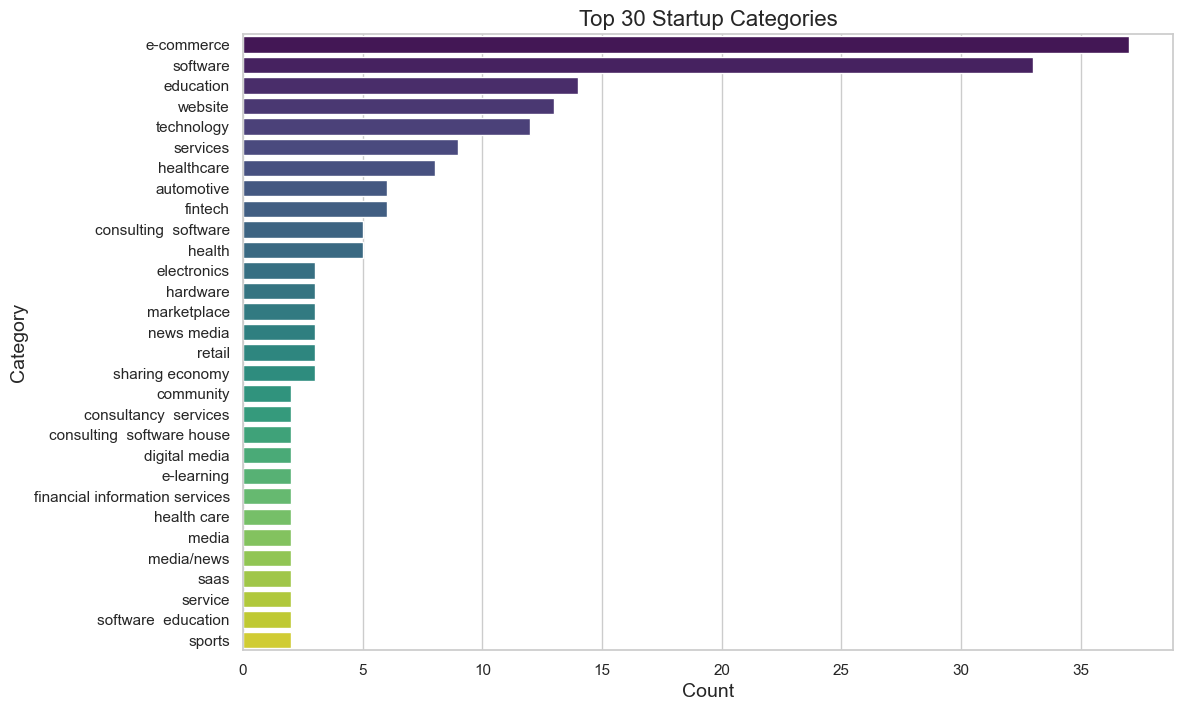

In [255]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert cat_wise to a DataFrame for plotting
cat_wise_df = cat_wise.reset_index()
cat_wise_df.columns = ['Category', 'Count']

# Set the style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Category', data=cat_wise_df, palette='viridis')

# Set labels and title
plt.xlabel('Count', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.title('Top 30 Startup Categories', fontsize=16)

# Show the plot
plt.show()


In [256]:
import plotly.express as px

# Reset index and rename columns for better readability
cat_wise_df = cat_wise.reset_index()
cat_wise_df.columns = ['Category', 'Count']

# Plot using Plotly Express
fig = px.bar(cat_wise_df, x='Count', y='Category', title='Top 30 Startup Categories', orientation='h',
             color='Category', color_discrete_sequence=px.colors.sequential.Viridis)

# Show the plot
fig.show()


In [257]:
import requests

# Define a DataFrame to store city coordinates
city_coordinates_df = pd.DataFrame(columns=['City', 'Latitude', 'Longitude'])


# Function to get latitude and longitude coordinates using OpenStreetMap Nominatim API
def get_coordinates(city):
    # Check if coordinates for the city are already available in the DataFrame
    if city in city_coordinates_df['City'].values:
        return city_coordinates_df.loc[city_coordinates_df['City'] == city, ['Latitude', 'Longitude']].values[0]
    else:
        # Fetch coordinates from the API
        url = f'https://nominatim.openstreetmap.org/search?city={city}&format=json'
        response = requests.get(url).json()
        if response:
            # Extract latitude and longitude from the response
            latitude = float(response[0]['lat'])
            longitude = float(response[0]['lon'])
            # Add coordinates to the DataFrame
            city_coordinates_df.loc[len(city_coordinates_df)] = [city, latitude, longitude]
            return latitude, longitude
        else:
            return None, None

# Apply the function to create new columns
# 
# 
# for latitude and longitude in the Startups DataFrame
Startups['Latitude'], Startups['Longitude'] = zip(*Startups['City'].apply(get_coordinates))

# Display the updated DataFrame
print(Startups)


                    Name                                           Location  \
0            Go Rickshaw  Go Logistics  Ground Floor  Palace Cinema Buil...   
1               DexterED                                          Islamabad   
2          TopSchools.pk                                          Islamabad   
3                Jobz.pk                                          Islamabad   
4          ContentStudio                                          Islamabad   
..                   ...                                                ...   
422     Branding in Asia                                 Seoul  South Korea   
423  WebDealer Solutions                                 Toronto  ON Canada   
424         Cooked Today                                      United States   
425               Folio3                                      United States   
426             CADDWORX                        White Plains  New York  USA   

                                               Tagl

In [258]:
Startups.head(3)

,Name,Location,Tagline,Category,Website,Founded,Description,Country,City,Founded Year,Latitude,Longitude
0,Go Rickshaw,Go Logistics Ground Floor Palace Cinema Buil...,GO Rickshaw redefines the entire idea of on-de...,transportation,https://gorickshaw.pk/,30th October 2015,NaN,Pakistan,Karachi,2015,24.854684,67.020706
1,DexterED,Islamabad,Dextered believes in Creative & Automated Asse...,education,http://dextered.com,23rd March 2015,At Dextered we are committed to not only revol...,Pakistan,Islamabad,2015,33.617104,73.073653
2,TopSchools.pk,Islamabad,Top Schools is a platform for all schools col...,web portal,http://www.topschools.pk,10th January 2014,Top schools is a web portal for all schools c...,Pakistan,Islamabad,2014,33.617104,73.073653


In [259]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# Group startups by city and count the number of startups in each city
startup_counts = Startups['City'].value_counts()

# Create a DataFrame with city and corresponding startup count
city_counts_df = pd.DataFrame({'City': startup_counts.index, 'Count': startup_counts.values})

# Get the latitude and longitude of each city
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="startup_heatmap")
city_counts_df['location'] = city_counts_df['City'].apply(lambda x: geolocator.geocode(x + ", Pakistan") if geolocator.geocode(x + ", Pakistan") else None)
city_counts_df = city_counts_df.dropna()

# Create a Folium map centered around Pakistan
map_pakistan = folium.Map(location=[30.3753, 69.3451], zoom_start=6)

# Create a HeatMap layer
heat_data = [[row['location'].latitude, row['location'].longitude, row['Count']] for index, row in city_counts_df.iterrows()]
HeatMap(heat_data, radius=15).add_to(map_pakistan)

# Display the map
map_pakistan


In [266]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd

# Group startups by city and count the number of startups in each city
startup_counts = Startups['City'].value_counts()

# Create a DataFrame with city and corresponding startup count
city_counts_df = pd.DataFrame({'City': startup_counts.index, 'Count': startup_counts.values})

# Get the latitude and longitude of each city
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="startup_heatmap")
city_counts_df['location'] = city_counts_df['City'].apply(lambda x: geolocator.geocode(x + ", Pakistan") if geolocator.geocode(x + ", Pakistan") else None)
city_counts_df = city_counts_df.dropna()

# Create a Folium map centered around Pakistan
map_pakistan3 = folium.Map(location=[30.3753, 69.3451], zoom_start=6)

# Create a MarkerCluster layer
marker_cluster = MarkerCluster().add_to(map_pakistan3)

# Add markers to the MarkerCluster layer
for index, row in city_counts_df.iterrows():
    folium.Marker(
        location=[row['location'].latitude, row['location'].longitude],
        popup=f"{row['City']}: {row['Count']} startups",
        icon=None,
    ).add_to(marker_cluster)

# Display the map
map_pakistan3


In [275]:
import folium
import json
import requests
import os

# Function to fetch GeoJSON data for a city
def get_geojson(city_name):
    url = f"https://nominatim.openstreetmap.org/search?city={city_name}&country=Pakistan&format=geojson"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch GeoJSON for {city_name}")
        return None

# Fetch unique city names from the 'City' column
city_names = Startups["City"].unique()

# Create a directory to save GeoJSON files
geojson_dir = "geojson_files"
os.makedirs(geojson_dir, exist_ok=True)

# Iterate over the city names and fetch/save their GeoJSON boundaries
city_geojson_map = {}
for city_name in city_names:
    geojson_data = get_geojson(city_name)
    if geojson_data:
        city_geojson_map[city_name] = geojson_data
        # Save GeoJSON data to a file
        with open(f"{geojson_dir}/{city_name}.geojson", "w", encoding="utf-8") as f:
            json.dump(geojson_data, f)

# Create a Folium map centered around Pakistan
map_pakistan1 = folium.Map(location=[30.3753, 69.3451], zoom_start=6)

# Iterate over city names and add Choropleth layer to the map
for city_name, geojson_data in city_geojson_map.items():
    folium.Choropleth(
        geo_data=geojson_data,
        fill_opacity=0.7,
        line_opacity=0.2,
        name=city_name,
    ).add_to(map_pakistan1)

# Save the map as an HTML file
map_pakistan1.save("startup_counts_map.html")

# Display the map
map_pakistan1


C:\Users\NimZee\AppData\Local\Temp\ipykernel_21236\2012555394.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




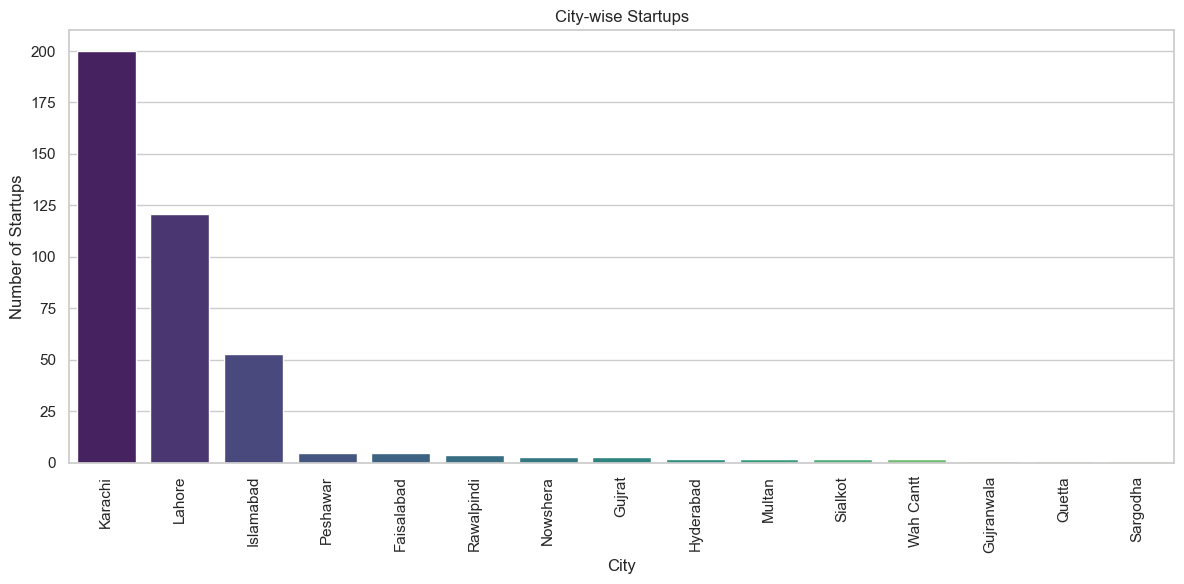

In [272]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame by startup count in descending order
city_counts_df_sorted = city_counts_df.sort_values(by='Count', ascending=False)

# Create the bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Count', data=city_counts_df_sorted, palette='viridis')
plt.xlabel('City')
plt.ylabel('Number of Startups')
plt.title('City-wise Startups')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [274]:
# Sort the DataFrame by startup count in descending order
city_counts_df_sorted = city_counts_df.sort_values(by='Count', ascending=False)

# Create the bar plot using Plotly
fig = px.bar(city_counts_df_sorted, x='City', y='Count', title='City-wise Startups', labels={'Count': 'Number of Startups', 'City': 'City'}, color='City')
fig.update_layout(xaxis={'categoryorder':'total descending'}, xaxis_title='City', yaxis_title='Number of Startups')
fig.show()

In [276]:
Startups.columns

Index(['Name', 'Location', 'Tagline', 'Category', 'Website', 'Founded',
       'Description', 'Country', 'City', 'Founded Year', 'Latitude',
       'Longitude'],
      dtype='object')

In [277]:
import plotly.express as px

# Group startups by founded year and count the number of startups in each year
startup_year_counts = Startups['Founded Year'].value_counts().reset_index()
startup_year_counts.columns = ['Founded Year', 'Count']

# Create the Plotly graph
fig = px.bar(startup_year_counts, x='Founded Year', y='Count', title='Number of Startups by Founded Year', 
            labels={'Count': 'Number of Startups', 'Founded Year': 'Founded Year'}, 
            color='Founded Year', color_continuous_scale=px.colors.sequential.Viridis)

# Show the graph
fig.show()


In [287]:
# Filter out rows with 'Not Provided' in the 'Founded_Year' column
filtered_startups = Startups[Startups['Founded Year'] != 'Not Provided']

# Convert 'Founded_Year' column to numeric (assuming it's a numerical column)
filtered_startups['Founded Year'] = pd.to_numeric(filtered_startups['Founded Year'], errors='coerce')

# Drop rows with NaN values in 'Founded_Year' column
filtered_startups = filtered_startups.dropna(subset=['Founded Year'])

# Group startups by founded year and count the number of startups in each year
startup_year_counts = filtered_startups['Founded Year'].value_counts().reset_index()
startup_year_counts.columns = ['Founded Year', 'Count']

# Create the Plotly bubble plot
fig = px.scatter(startup_year_counts, x='Founded Year', y='Count', size='Count', 
                title='Number of Startups by Founded Year', 
                labels={'Count': 'Number of Startups', 'Founded Year': 'Founded Year'},
                color='Founded Year', color_continuous_scale=px.colors.sequential.Viridis)

# Show the bubble plot
fig.show()


C:\Users\NimZee\AppData\Local\Temp\ipykernel_21236\625640280.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [291]:
import plotly.express as px

# Filter out rows with 'Not Provided' in the 'Founded_Year' column
filtered_startups = Startups[Startups['Founded Year'] != 'Not Provided']

# Convert 'Founded_Year' column to numeric (assuming it's a numerical column)
filtered_startups['Founded Year'] = pd.to_numeric(filtered_startups['Founded Year'], errors='coerce')

# Drop rows with NaN values in 'Founded_Year' column
filtered_startups = filtered_startups.dropna(subset=['Founded Year'])

# Group startups by founded year and count the number of startups in each year
startup_year_counts = filtered_startups['Founded Year'].value_counts().reset_index()
startup_year_counts.columns = ['Founded Year', 'Count']

# Sort startup_year_counts DataFrame by 'Founded_Year' column in ascending order
startup_year_counts = startup_year_counts.sort_values(by='Founded Year', ascending=True)

# Create the Plotly bubble plot
fig = px.scatter(startup_year_counts, x='Founded Year', y='Count', size='Count', 
                 title='Number of Startups by Founded Year', 
                 labels={'Count': 'Number of Startups', 'Founded Year': 'Founded Year'},
                 color='Founded Year', color_continuous_scale=px.colors.sequential.Viridis)

# Show the bubble plot
fig.show()


C:\Users\NimZee\AppData\Local\Temp\ipykernel_21236\2287344049.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [293]:
import plotly.express as px
import pandas as pd

# Filter out rows with 'Not Provided' in the 'Founded Year' column
filtered_startups = Startups[Startups['Founded Year'] != 'Not Provided']

# Convert 'Founded Year' column to numeric (assuming it's a numerical column)
filtered_startups['Founded Year'] = pd.to_numeric(filtered_startups['Founded Year'], errors='coerce')

# Drop rows with NaN values in 'Founded Year' column
filtered_startups = filtered_startups.dropna(subset=['Founded Year'])

# Group startups by founded year and count the number of startups in each year
startup_year_counts = filtered_startups['Founded Year'].value_counts().reset_index()
startup_year_counts.columns = ['Founded Year', 'Count']

# Sort startup_year_counts DataFrame by 'Founded Year' column in ascending order
startup_year_counts = startup_year_counts.sort_values(by='Founded Year', ascending=True)

# Create the Plotly bubble plot
fig = px.scatter(startup_year_counts, x='Founded Year', y='Count', size='Count', 
                 title='Number of Startups by Founded Year', 
                 labels={'Count': 'Number of Startups', 'Founded Year': 'Founded Year'},
                 color='Founded Year', color_continuous_scale=px.colors.sequential.Viridis)

# Add a range slider for selecting the range of years
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        ),
        type='linear'  # Set the type of x-axis to linear
    )
)

# Show the bubble plot
fig.show()


C:\Users\NimZee\AppData\Local\Temp\ipykernel_21236\2223788024.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['Founded Year', 'Count'] but received: Category